 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [18]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

In [19]:
## Whale Returns
#Read the Whale Portfolio daily returns and clean the data

In [20]:
# Use Path to name csv file location whale_returns_csv & pd.read_csv to read in data
#check data for abnormalaties in df using head function
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df.head()


Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
0  2015-03-02                        NaN                 NaN   
1  2015-03-03                  -0.001266           -0.004981   
2  2015-03-04                   0.002230            0.003241   
3  2015-03-05                   0.004016            0.004076   
4  2015-03-06                  -0.007905           -0.003574   

   TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
0                          NaN                     NaN  
1                    -0.000496               -0.006569  
2                    -0.002534                0.004213  
3                     0.002355                0.006726  
4                    -0.008481               -0.013098

In [21]:
# convert dates to DateTimeIndex & drop OG 'Date' columnn 
# Check for null values & count sum of nulls using isnull and sum functions
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'], infer_datetime_format=True), inplace=True)
whale_returns_df.drop(columns=['Date'], inplace=True)
whale_returns_df.isnull().sum()



SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [22]:
# Drop null values using dropna & inplace=True to keep df w/ valid entries in df 
# run sum of isnull functions again to check your work: all outputs should be 0
whale_returns_df.dropna(inplace=True)
whale_returns_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [27]:
# Use Path to name csv file location algo_returns_csv
# Use pandas library and read_csv function to read in csv as dataframe with new name algo_returns_df
# quickly check df for abnormalaties using head function
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df.head()

Date    Algo 1  Algo 2
0  2014-05-28  0.001745     NaN
1  2014-05-29  0.003978     NaN
2  2014-05-30  0.004464     NaN
3  2014-06-02  0.005692     NaN
4  2014-06-03  0.005292     NaN

In [28]:
# convert dates to DateTimeIndex & drop OG 'Date' columnn 
# Check for null values & count sum of nulls using isnull and sum functions
algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'], infer_datetime_format=True), inplace=True)
algo_returns_df.drop(columns=['Date'], inplace=True)
algo_returns_df.isnull().sum()



Algo 1  Algo 2
Date                        
2014-05-28  0.001745     NaN
2014-05-29  0.003978     NaN
2014-05-30  0.004464     NaN
2014-06-02  0.005692     NaN
2014-06-03  0.005292     NaN

In [25]:
# Drop null values using dropna & inplace=True to keep df w/ valid entries in df 
# run sum of isnull functions again to check your work: all outputs should be 0
algo_returns_df.dropna(inplace=True)
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [65]:
# Reading S&P 500 Closing Prices
# Use Path to name csv file location sp500_history_csv
#Use pandas library and read_csv function to read in csv as dataframe with new name sp500_history_df
#quickly check df for abnormalities using head function
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df.head()

Date     Close
0  23-Apr-19  $2933.68
1  22-Apr-19  $2907.97
2  18-Apr-19  $2905.03
3  17-Apr-19  $2900.45
4  16-Apr-19  $2907.06

In [66]:
# Use dtypes attribute to view datatypes in dataframe
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.dtypes

Date     object
Close    object
dtype: object

In [67]:
# Fix Data Types
# convert dates to DateTimeIndex & drop OG 'Date' columnn
sp500_history_df.set_index(pd.to_datetime(sp500_history_df['Date'], infer_datetime_format=True), inplace=True)
sp500_history_df.drop(columns=['Date'], inplace=True)

# for 'Close' column drop "$" & assign dtype as 'float'
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$',' ')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [69]:
# Calculate Daily Returns
# New var = daily_returns, run pct_change function against sp500_history_df & run head function to verify output is accurate
daily_returns = sp500_history_df.pct_change()
daily_returns.head()

Close
Date                
2019-04-23       NaN
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279

In [74]:
# Drop nulls
# Drop nulls from daily_returns using .dropna, check count of nulls w/ .isnull().sum(), check output w/ .head()
daily_returns.dropna(inplace=True)
daily_returns.isnull().sum()
daily_returns.head()

Close
Date                
2019-04-22 -0.008764
2019-04-18 -0.001011
2019-04-17 -0.001577
2019-04-16  0.002279
2019-04-15 -0.000509

In [79]:
# Rename Column
# Rename Close column to S&P 500 - use .rename & choose prev column name ("Close") chan
sp500_history_df = sp500_history_df.rename(columns={
    "Close": "S&P 500"
})
sp500_history_df.head()

S&P 500
Date               
2019-04-23  2933.68
2019-04-22  2907.97
2019-04-18  2905.03
2019-04-17  2900.45
2019-04-16  2907.06

## Combine Whale, Algorithmic, and S&P 500 Returns

In [80]:
# Concatenate all DataFrames into a single DataFrame
# var combined_df = use Pandas concat function for 3 df - ([whale_returns_df, algo_returns_df, sp500_history_df]), axis=columns, join=inner
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")
combined_df

SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
...                                 ...                     ...       ...   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2  S&P 500  
Date                           
2015-03-03 -0.000949  2107.78  
2015-03-04  0.002416  2098.53  
2015-03-05  0.004323  2101.04  
2015-03-06 -0.011460  2071.26  
2015-03-09  0.001303  2079.43  
...              ...      ...  
2019-04-16  0.002899  2907.06  
2019-04-17 -0.005228  2900.45  
2019-04-18 -0.001229  2905.03  
2019-04-22 -0.001936  2907.97  
2019-04-23  0.009622  2933.68  

[1043 rows x 7 columns]

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

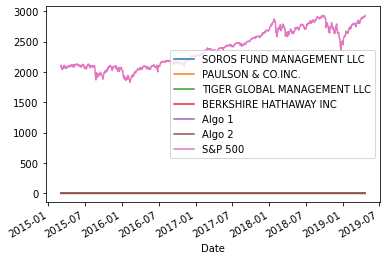

In [94]:
# Plot daily returns
# YOUR CODE HERE
# Calculate daily returns

In [ ]:
# Plot cumulative returns
# YOUR CODE HERE

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [ ]:
# Box plot to visually show risk
# YOUR CODE HERE

In [ ]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

In [ ]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE

In [ ]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

In [ ]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE

In [ ]:
# Construct a correlation table
# YOUR CODE HERE

In [ ]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

In [ ]:
# Calculate a rolling window using the exponentially weighted moving average. 
# YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [ ]:
# Calculate annualized Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [ ]:
# Read the first stock
# YOUR CODE HERE

In [ ]:
# Read the second stock
# YOUR CODE HERE

In [ ]:
# Read the third stock
# YOUR CODE HERE

In [ ]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [ ]:
# Reset the index
# YOUR CODE HERE

In [ ]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [ ]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [ ]:
# Risk
# YOUR CODE HERE

In [ ]:
# Rolling
# YOUR CODE HERE

In [ ]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [ ]:
# Create a correlation analysis
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE